# ITBA 82.05 : Análisis Predictivo 

# Kaggle Challenge : Submission of a predictive model 

# Elsa DOYEN

## Introduction

For the second part of the predictive analytics course, we're going to run a Kaggle challenge. The aim is to introduce us to the different learning algorithms available. In effect, we'll have to use a training database to obtain the best possible prediction. 

In this notebook, you will find the work done for this project.

In [1]:
# Package import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

## Data download

In [2]:
data = pd.read_csv('origen.csv')
data_test = pd.read_csv('testear.csv')

In [3]:
data.head()

,Unnamed: 0,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes,genres_x,directors,...,genres_y,original_language,popularity,production_companies,production_countries,revenue,runtime,status,tagline,video
0,0,4.4,15,movie,0.0,1951,0,91,"Comedy,Musical",nm0883334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,7.0,990,tvSeries,0.0,2007,2021,30,"Action,Adventure,Animation","nm2291816,nm3088555,nm4930005,nm1746040",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,8.1,41,tvEpisode,0.0,2011,0,44,"Documentary,History,War",nm0414025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4.6,48,movie,0.0,1969,0,84,Drama,nm2977268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5.6,28,movie,0.0,2010,0,130,"Comedy,Drama",nm2366663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_test.head()

,Unnamed: 0,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes,genres_x,directors,writers,...,genres_y,original_language,popularity,production_companies,production_countries,revenue,runtime,status,tagline,video
0,0,10,tvEpisode,0.0,1980,0,0,"Drama,Family,Fantasy",0,nm0416721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,17,tvEpisode,0.0,2014,0,0,"Drama,War",nm1573573,"nm0208548,nm2952524,nm0429741,nm0894424",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,7,tvEpisode,0.0,2004,0,0,Music,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,297,tvEpisode,0.0,2002,0,30,Comedy,nm0952360,"nm0742814,nm0804887,nm0005380",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,10,tvEpisode,0.0,2016,0,23,"Animation,Comedy,Crime",nm2268014,nm1138389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In this project, we'll run learning models on a dataset called "data" taken from the "origen.csv" file, which contains the "averageRating" response variable and 27 other variables. We will then test our models on the "testear.csv" dataset called "data_test", which does not contain the response variable. The aim is to find a model that maximizes $R^2$.

## Cleaning og the dataset

In this section, we are going to clean up the dataset. In fact, when we take a quick look at the data above, we will quickly notice that there's a lot of missing data. This step is essential to ensure that there are no unknown or extreme values, or values that are too difficult to take into account in the learning process.
All the work we are going to do on the "data" dataset we're also going to do on the "data_test" dataset. In fact, both datasets must be configured in the same way if we are to obtain relevant results.

The following function, "data.info()", lets us see the number of data items present per variable. This allows us to quickly identify which variables have many missing values.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977541 entries, 0 to 977540
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            977541 non-null  int64  
 1   averageRating         977541 non-null  float64
 2   numVotes              977541 non-null  int64  
 3   titleType             977541 non-null  object 
 4   isAdult               977541 non-null  float64
 5   startYear             977541 non-null  int64  
 6   endYear               977541 non-null  int64  
 7   runtimeMinutes        977541 non-null  int64  
 8   genres_x              977539 non-null  object 
 9   directors             977541 non-null  object 
 10  writers               977541 non-null  object 
 11  seasonNumber          438243 non-null  float64
 12  episodeNumber         438243 non-null  float64
 13  ordering              370623 non-null  float64
 14  language              370623 non-null  object 
 15  

The "data.describe()" function can be used to quickly describe trends in numerical variables. 

In [6]:
data.describe()

,Unnamed: 0,averageRating,numVotes,isAdult,startYear,endYear,runtimeMinutes,seasonNumber,episodeNumber,ordering,isOriginalTitle,budget,popularity,revenue,runtime
count,977541.000000,977541.000000,9.775410e+05,977541.000000,977541.000000,977541.000000,977541.000000,438243.000000,438243.000000,370623.000000,370623.000000,4.737000e+04,47369.000000,4.736900e+04,47158.000000
mean,488770.000000,6.881764,1.625621e+03,0.023017,1999.356151,58.196713,41.363622,4.061229,55.341327,3.479414,0.000019,6.180242e+06,3.433752,1.843587e+07,94.437508
std,282191.924082,1.405315,2.509798e+04,2.888235,34.362292,336.455028,57.788808,12.336583,585.538414,5.148422,0.004346,2.309356e+07,7.120486,9.294434e+07,36.021579
min,0.000000,1.000000,5.000000e+00,0.000000,0.000000,0.000000,-22336.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,244385.000000,6.100000,9.000000e+00,0.000000,1992.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000e+00,0.442903,0.000000e+00,85.000000
50%,488770.000000,7.100000,2.200000e+01,0.000000,2008.000000,0.000000,27.000000,2.000000,8.000000,2.000000,0.000000,0.000000e+00,1.282498,0.000000e+00,95.000000
75%,733155.000000,7.900000,9.300000e+01,0.000000,2015.000000,0.000000,73.000000,4.000000,16.000000,3.000000,0.000000,0.000000e+00,4.665202,0.000000e+00,106.000000
max,977540.000000,10.000000,2.425542e+06,2020.000000,2021.000000,2022.000000,13319.000000,2012.000000,15762.000000,162.000000,1.000000,3.800000e+08,547.488298,2.787965e+09,1256.000000


In [7]:
data = data.set_index('Unnamed: 0') 
data_test = data_test.set_index('Unnamed: 0') 

We can see that several variables contain too many Nans. So I decided to delete the variables where more than 75% of the data was Nan. Indeed, with too many Nans, these variables are not interesting to take into account in learning, as they don't contain enough usable information.

In [8]:
missing_percent = (data.isna().sum() / len(data)) * 100

# Identifiez les colonnes avec plus de 75% de NaN
columns_to_drop = missing_percent[missing_percent > 75].index

# Supprimez ces colonnes
data = data.drop(columns=columns_to_drop)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977541 entries, 0 to 977540
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   averageRating    977541 non-null  float64
 1   numVotes         977541 non-null  int64  
 2   titleType        977541 non-null  object 
 3   isAdult          977541 non-null  float64
 4   startYear        977541 non-null  int64  
 5   endYear          977541 non-null  int64  
 6   runtimeMinutes   977541 non-null  int64  
 7   genres_x         977539 non-null  object 
 8   directors        977541 non-null  object 
 9   writers          977541 non-null  object 
 10  seasonNumber     438243 non-null  float64
 11  episodeNumber    438243 non-null  float64
 12  ordering         370623 non-null  float64
 13  language         370623 non-null  object 
 14  attributes       370623 non-null  object 
 15  isOriginalTitle  370623 non-null  float64
dtypes: float64(6), int64(4), object(6)
mem

We've kept 15 variables in addition to 'averageRating', which is our response variable. We'll now take a closer look at the variables that still contain Nan to see if they can be completed.

In [10]:
data.describe()

,averageRating,numVotes,isAdult,startYear,endYear,runtimeMinutes,seasonNumber,episodeNumber,ordering,isOriginalTitle
count,977541.000000,9.775410e+05,977541.000000,977541.000000,977541.000000,977541.000000,438243.000000,438243.000000,370623.000000,370623.000000
mean,6.881764,1.625621e+03,0.023017,1999.356151,58.196713,41.363622,4.061229,55.341327,3.479414,0.000019
std,1.405315,2.509798e+04,2.888235,34.362292,336.455028,57.788808,12.336583,585.538414,5.148422,0.004346
min,1.000000,5.000000e+00,0.000000,0.000000,0.000000,-22336.000000,0.000000,0.000000,1.000000,0.000000
25%,6.100000,9.000000e+00,0.000000,1992.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000
50%,7.100000,2.200000e+01,0.000000,2008.000000,0.000000,27.000000,2.000000,8.000000,2.000000,0.000000
75%,7.900000,9.300000e+01,0.000000,2015.000000,0.000000,73.000000,4.000000,16.000000,3.000000,0.000000
max,10.000000,2.425542e+06,2020.000000,2021.000000,2022.000000,13319.000000,2012.000000,15762.000000,162.000000,1.000000


Here we can see that in the "isAdult" variable there's a maximum value that seems to be extreme. Let's take a look at the data distribution of this variable.

In [11]:
print(data['isAdult'].value_counts())

0.0       959073
1.0        18466
2014.0         1
2020.0         1
Name: isAdult, dtype: int64


Here, two values seem extreme, so we'll remove them.

In [12]:
data = data[(data['isAdult'] == 0) | (data['isAdult'] == 1)]
data_test = data_test[(data_test['isAdult'] == 0) | (data_test['isAdult'] == 1)]
print(data['isAdult'].value_counts())

0.0    959073
1.0     18466
Name: isAdult, dtype: int64


In [13]:
data['isAdult'] = data['isAdult'].astype(str)
data_test['isAdult'] = data_test['isAdult'].astype(str)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977539 entries, 0 to 977540
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   averageRating    977539 non-null  float64
 1   numVotes         977539 non-null  int64  
 2   titleType        977539 non-null  object 
 3   isAdult          977539 non-null  object 
 4   startYear        977539 non-null  int64  
 5   endYear          977539 non-null  int64  
 6   runtimeMinutes   977539 non-null  int64  
 7   genres_x         977539 non-null  object 
 8   directors        977539 non-null  object 
 9   writers          977539 non-null  object 
 10  seasonNumber     438241 non-null  float64
 11  episodeNumber    438241 non-null  float64
 12  ordering         370623 non-null  float64
 13  language         370623 non-null  object 
 14  attributes       370623 non-null  object 
 15  isOriginalTitle  370623 non-null  float64
dtypes: float64(5), int64(4), object(7)
mem

We will now work on the "seasonNumber" and "episodeNumber" variables. These variables contain many Nans, but can be completed by logical reasoning. First, we will look at the different video categories in the database.

In [15]:
category = data['titleType'].unique()
print(category)

['movie' 'tvSeries' 'tvEpisode' 'short' 'video' 'tvSpecial' 'tvMovie'
 'tvMiniSeries' 'videoGame' 'tvShort']


We can now consider that for videos of type 'movie', 'video', 'tvSpecial', 'tvMovie' or 'videoGame', if the number of episodes is not indicated, we can set it to 1, as these categories suggest that there is only one episode. For the rest of the categories, we'll use the median number of episodes. Similarly, for these categories, the number of seasons is assumed to be 0 if not indicated. 

In [16]:
oneseason=data[data['seasonNumber']==1]
median=oneseason["episodeNumber"].dropna().median()
median

7.0

In [17]:
oneseason = data_test[data_test['seasonNumber']==1]
median=oneseason["episodeNumber"].dropna().median()
median

7.0

In [18]:
# Fonction to replace NaN in episodeNumber
def replace_nan_episode(row):
    if row['titleType'] in ['movie', 'video', 'tvSpecial', 'tvMovie', 'videoGame'] and pd.isna(row['episodeNumber']):
        return 1
    else:
        return 7

In [19]:
# Fonction to replace NaN in seasonNumber
def replace_nan_season(row):
    if row['titleType'] in ['movie', 'video', 'tvSpecial', 'tvMovie', 'videoGame'] and pd.isna(row['seasonNumber']):
        return 0
    else:
        return 1

We can now apply these functions to our "data" and "data_test" datasets.

In [20]:
data['episodeNumber'] = data.apply(replace_nan_episode, axis=1)
data['seasonNumber'] = data.apply(replace_nan_season, axis=1)

data_test['episodeNumber'] = data_test.apply(replace_nan_episode, axis=1)
data_test['seasonNumber'] = data_test.apply(replace_nan_season, axis=1)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977539 entries, 0 to 977540
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   averageRating    977539 non-null  float64
 1   numVotes         977539 non-null  int64  
 2   titleType        977539 non-null  object 
 3   isAdult          977539 non-null  object 
 4   startYear        977539 non-null  int64  
 5   endYear          977539 non-null  int64  
 6   runtimeMinutes   977539 non-null  int64  
 7   genres_x         977539 non-null  object 
 8   directors        977539 non-null  object 
 9   writers          977539 non-null  object 
 10  seasonNumber     977539 non-null  int64  
 11  episodeNumber    977539 non-null  int64  
 12  ordering         370623 non-null  float64
 13  language         370623 non-null  object 
 14  attributes       370623 non-null  object 
 15  isOriginalTitle  370623 non-null  float64
dtypes: float64(3), int64(6), object(7)
mem

There is no Nan left in "episodeNumber" or "seasonNumber".

We're now going to work on the "directors" and "writers" variables. These variables are special in that they are categorical and can also contain one or more director or writer identifiers. In fact, a film can be written and directed by one or more people.

Let's see how many directors and writers there are in all in the dataset.

In [22]:
print("number of directors " + str(len(data['directors'].unique())))
print("number of writers " + str(len(data['writers'].unique())))

number of directors 240557
number of writers 398877


Here, the number of directors and ecrain is far too great. So we can't create a category for each different name and put a 1 or 0 if the identifier is actually the director or writer of the video. So we'll consider the first director or writer to be the most important, and keep only that one. 

In [23]:
columns_to_clean = ['directors', 'writers']

for column in columns_to_clean:
    data[column] = data[column].str.lstrip('nm')
    data[column] = data[column].str.split(',').str[0]
    
    data_test[column] = data_test[column].str.lstrip('nm')
    data_test[column] = data_test[column].str.split(',').str[0]


In [24]:
print(data[['directors','writers']])

           directors  writers
Unnamed: 0                   
0            0883334  0844784
1            2291816  1707665
2            0414025  0414025
3            2977268  2977268
4            2366663  4290500
...              ...      ...
977536       0215126  0215126
977537       0235066  0496468
977538             0        0
977539       0290882  0009312
977540       1707462  0052218

[977539 rows x 2 columns]


For the "ordering" variable, I replace Nan with the average.

In [25]:
mean_ordering = int(data['ordering'].mean())
data['ordering'].fillna(mean_ordering, inplace=True)

In [26]:
mean_ordering_test = int(data_test['ordering'].mean())
data_test['ordering'].fillna(mean_ordering_test, inplace=True)

In [27]:
data.head()

,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes,genres_x,directors,writers,seasonNumber,episodeNumber,ordering,language,attributes,isOriginalTitle
Unnamed: 0,,,,,,,,,,,,,,,,
0,4.4,15,movie,0.0,1951,0,91,"Comedy,Musical",0883334,0844784,0,1,3.0,NaN,NaN,NaN
1,7.0,990,tvSeries,0.0,2007,2021,30,"Action,Adventure,Animation",2291816,1707665,1,7,5.0,0,0,0.0
2,8.1,41,tvEpisode,0.0,2011,0,44,"Documentary,History,War",0414025,0414025,1,7,3.0,NaN,NaN,NaN
3,4.6,48,movie,0.0,1969,0,84,Drama,2977268,2977268,0,1,5.0,0,0,0.0
4,5.6,28,movie,0.0,2010,0,130,"Comedy,Drama",2366663,4290500,0,1,3.0,NaN,NaN,NaN


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977539 entries, 0 to 977540
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   averageRating    977539 non-null  float64
 1   numVotes         977539 non-null  int64  
 2   titleType        977539 non-null  object 
 3   isAdult          977539 non-null  object 
 4   startYear        977539 non-null  int64  
 5   endYear          977539 non-null  int64  
 6   runtimeMinutes   977539 non-null  int64  
 7   genres_x         977539 non-null  object 
 8   directors        977539 non-null  object 
 9   writers          977539 non-null  object 
 10  seasonNumber     977539 non-null  int64  
 11  episodeNumber    977539 non-null  int64  
 12  ordering         977539 non-null  float64
 13  language         370623 non-null  object 
 14  attributes       370623 non-null  object 
 15  isOriginalTitle  370623 non-null  float64
dtypes: float64(3), int64(6), object(7)
mem

There are still 3 variables with Nan. As I'm not sure how to complete them, I prefer to delete them. So I delete 'language' , 'attributes' and 'isOriginalTitle'.

In [29]:
data = data[['averageRating','numVotes','titleType','isAdult','startYear','endYear','runtimeMinutes','genres_x','directors','writers',
                'seasonNumber','episodeNumber','ordering']]

In [30]:
columns_names = data.columns.tolist()
column_to_remove = 'averageRating'

if column_to_remove in columns_names:
    columns_names.remove(column_to_remove)

columns_names

['numVotes',
 'titleType',
 'isAdult',
 'startYear',
 'endYear',
 'runtimeMinutes',
 'genres_x',
 'directors',
 'writers',
 'seasonNumber',
 'episodeNumber',
 'ordering']

In [31]:
data_test = data_test[columns_names]

In [32]:
data.head()

,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes,genres_x,directors,writers,seasonNumber,episodeNumber,ordering
Unnamed: 0,,,,,,,,,,,,,
0,4.4,15,movie,0.0,1951,0,91,"Comedy,Musical",0883334,0844784,0,1,3.0
1,7.0,990,tvSeries,0.0,2007,2021,30,"Action,Adventure,Animation",2291816,1707665,1,7,5.0
2,8.1,41,tvEpisode,0.0,2011,0,44,"Documentary,History,War",0414025,0414025,1,7,3.0
3,4.6,48,movie,0.0,1969,0,84,Drama,2977268,2977268,0,1,5.0
4,5.6,28,movie,0.0,2010,0,130,"Comedy,Drama",2366663,4290500,0,1,3.0


We check that there are no more missing values in our two datasets.

In [33]:
missing_values = data.isna()
missing_count = missing_values.sum()
missing_count

averageRating     0
numVotes          0
titleType         0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres_x          0
directors         0
writers           0
seasonNumber      0
episodeNumber     0
ordering          0
dtype: int64

In [34]:
missing_values = data_test.isna()
missing_count = missing_values.sum()
missing_count

numVotes          0
titleType         0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres_x          0
directors         0
writers           0
seasonNumber      0
episodeNumber     0
ordering          0
dtype: int64

Our datasets are now clean and Nan-free. We have now only 12 variables.

We are now going to work on categorical variables that can be easily encoded. 

In [35]:
category = data['titleType'].unique()
print(category)

['movie' 'tvSeries' 'tvEpisode' 'short' 'video' 'tvSpecial' 'tvMovie'
 'tvMiniSeries' 'videoGame' 'tvShort']


In [36]:
data = pd.get_dummies(data, columns=['titleType'], prefix=['titleType'])
data_test = pd.get_dummies(data_test, columns=['titleType'], prefix=['titleType'])

In [37]:
genres = data['genres_x'].unique()
print(genres)

['Comedy,Musical' 'Action,Adventure,Animation' 'Documentary,History,War'
 ... 'Family,History,Horror' 'Adult,Music,Short' 'Fantasy,War']


Note that a video can be placed in several genres. So we'll have to separate the different genres of each video and put a 1 in the column of genres to which they belong.

In [38]:
# Divides multiple values into distinct categories for the 'genre_x' column
data['genres_x'] = data['genres_x'].str.split(',')
data_test['genres_x'] = data_test['genres_x'].str.split(',')


# Creates indicator columns for each unique category in 'genre_x'.
unique_genres = set(genre for genres in data['genres_x'] for genre in genres)
for genre in unique_genres:
    data[genre] = data['genres_x'].apply(lambda genres: 1 if genre in genres else 0)
    data_test[genre] = data_test['genres_x'].apply(lambda genres: 1 if genre in genres else 0)

    
# Delete the genres_x column in the dataset
data.drop('genres_x', axis=1, inplace=True)  
data_test.drop('genres_x', axis=1, inplace=True)

## Creation of training and test samples.

Now that we've cleaned up our data, we can separate it into training and test sets.

In [39]:
X = data.drop('averageRating', axis=1)
y = data['averageRating']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
missing_values = X_train.isna()
missing_count = missing_values.sum()
missing_count

numVotes                  0
isAdult                   0
startYear                 0
endYear                   0
runtimeMinutes            0
directors                 0
writers                   0
seasonNumber              0
episodeNumber             0
ordering                  0
titleType_movie           0
titleType_short           0
titleType_tvEpisode       0
titleType_tvMiniSeries    0
titleType_tvMovie         0
titleType_tvSeries        0
titleType_tvShort         0
titleType_tvSpecial       0
titleType_video           0
titleType_videoGame       0
History                   0
Fantasy                   0
Adult                     0
Comedy                    0
Family                    0
Western                   0
Drama                     0
Music                     0
Sport                     0
Adventure                 0
Mystery                   0
Short                     0
Musical                   0
Film-Noir                 0
News                      0
Horror              

In [42]:
y_train

Unnamed: 0
26133     8.4
151358    8.3
856208    8.2
387875    6.8
562425    7.2
         ... 
259179    7.8
365839    9.0
131933    7.4
671157    7.5
121959    4.2
Name: averageRating, Length: 782031, dtype: float64

## Testing several models

We will now try out several quick-to-implement models to see which algorithm performs best on our database. To compare their performance, we'll compare their MSE and $R^2$.

For each algorithm we will proceed as follows: 
- Model initialization
- Training the model on our training set
- Prediction on the test set
- Evaluation of model performance

### Linear regression model

In [53]:
# Initialization
model = LinearRegression()

# Training
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation of model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse} and R-squared {r2}')

Mean Squared Error: 1.5815345498095275 and R-squared 0.19669383530143958


### Random Forest model

In [54]:
model = RandomForestRegressor(n_estimators=50, max_depth = None, random_state=42)

# Training
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation of model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse} and R-squared {r2}')

Mean Squared Error: 1.0323358275120087 and R-squared 0.4756474119522327


### Gradient Boosting model

In [55]:
# Initialization
model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42)

# Training
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation of model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse} and R-squared {r2}")

Mean Squared Error: 1.4764582159899695 and R-squared 0.25006507953466883


### KNN model

In [57]:
# Initialization
knn_regressor = KNeighborsRegressor(n_neighbors=3)

# Training
knn_regressor.fit(X_train, y_train)

# Prediction
y_pred = knn_regressor.predict(X_test)

# Evaluation of model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse} and R-squared {r2}")

Mean Squared Error: 1.6904322926257067 and R-squared 0.14138158927018418


### SVM model

I tried to get the following code to work, but it was already taking far too long for a basic model. I therefore concluded that the SVM algorithm was not suitable for our database. 

In [ ]:
'''# Initialization
svm_regressor = SVR(kernel='linear', C=1.0)

# Training
svm_regressor.fit(X_train, y_train)

# Prediction
y_pred = svm_regressor.predict(X_test)

# Evaluation of model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse} and R-squared {r2}")
'''

At first glance, the random forest model seems to be the most appropriate for our dataset, as it has the highest $R^2$.

## Choice of model: Random Forest

We are now going to test our model with several hyper-parameters. All the hyperparameters tested are not listed here, as I have progressively removed the less efficient hyperparameters. To look at the model's performance, we always look at the MSE and $R^2$.

I tried to realize several models by modifying the hyperparameters "n_estimators", which corresponds to the number of decision trees to be built in the forest, "max_depth", which controls the maximum depth of each decision tree in the forest, and "min_samples_split", which controls the minimum number of samples required to split an internal node in a decision tree of the random forest.

After several tests, we noticed that the greater the number of trees, the greater the $R^2$. So I decided to keep the number of trees at 150 so that the algorithm wouldn't take too long to run.

In [89]:
# Initialization
model = RandomForestRegressor(n_estimators=150, max_depth = 40, random_state=42)

# Training
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation of model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse} and R-squared {r2}')

Mean Squared Error: 1.0162914042061273 and R-squared 0.48379682870205953


In [87]:
# Initialization
model = RandomForestRegressor(n_estimators=150, max_depth = 20, min_samples_split=2, random_state=42)

# Training
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation of model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse} and R-squared {r2}')

Mean Squared Error: 1.1016120660452917 and R-squared 0.44046004947089046


In [88]:
# Initialization
model = RandomForestRegressor(n_estimators=150, max_depth = 20, min_samples_split=5, random_state=42)

# Training
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation of model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse} and R-squared {r2}')

Mean Squared Error: 1.1026886523406456 and R-squared 0.4399132208176739


After several tests, the best value for "min_sample_split" is 2, which is also the default value for this hyperparameter. We therefore don't need to specify it, but keep "min_sample_split" = 2.

In [43]:
# Initialization
model = RandomForestRegressor(n_estimators=150, max_depth = 30, random_state=42)

# Training
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation of model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse} and R-squared {r2}')

Mean Squared Error: 1.016742553319181 and R-squared 0.48356767729733185


In terms of performance and execution time, I've decided to stick with the latest model presented here. Indeed, even if the first model has a slightly higher $R^2$, the difference in time to run the two models is significant. This is why, for an almost equal score, I prefer to keep the faster algorithm. This is the model we'll use to predict the "data_test" dataset.

In [44]:
# Predict using the trained model
y_pred_other = model.predict(data_test)

# Print the predictions for the other data
print("Predictions for other data:")
print(y_pred_other)



Predictions for other data:
[7.51559484 7.70758502 6.34392474 ... 5.86006086 7.20206317 4.96290891]


In [45]:
len(y_pred_other)

244386

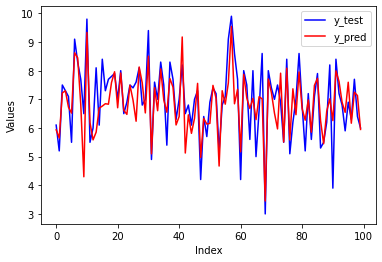

In [50]:
indices = np.arange(len(y_pred[:100]))

plt.plot(indices, y_test[:100], label='y_test', color='blue')
plt.plot(indices, y_pred[:100], label='y_pred', color='red')

plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()

plt.show()


In [46]:
salida = pd.DataFrame(data={"averageRating": y_pred_other}).astype(str)
salida.index = data_test.index
salida.to_csv("submission6.csv", sep=',',index=True,  index_label='Id')

With this model, I get an $R^2 = 0.4836$. I can now submit this model to Kaggle.

# Conclusion

To conclude this project, a lot of clean-up work had to be done on the data. In fact, it was essential to clean everything thoroughly before using it, in order to obtain results as close to reality as possible. Next, work on the various models and parameters enabled me to choose a Random Forest algorithm with the following hyperparameters: 
- n_estimators = 150 ,
- max_depth = 30 ,
- min_samples_split = 2


If I'd had more time, I could have improved my model using other techniques such as cross-validation. Indeed, this technique allows us to identify, for example, whether our model is over- or under-fitted.
